In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Konfigurace vizualizace dat
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
matplotlib.style.use('ggplot')
pd.options.display.max_rows = 15

### Experimentální část -- Granularita rozdělení

Testováno na souboru `kun12.txt`.

```
  mpirun -np 4 bin/pdpjes test/fixtures/kun12.txt
```

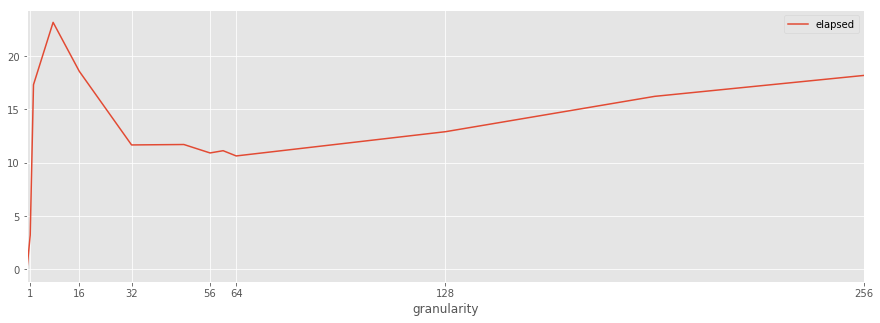

In [22]:
exp_results = pd.DataFrame(data={
    'granularity': [
        0, 1, 2, 8, 16, 32, 
        48, 56, 60, 64, 
        128, 192, 256], 
    'elapsed': [
        0, 3.22, 17.3, 23.14, 18.56, 11.66, 
        11.7, 10.91, 11.12, 10.63, 
        12.9, 16.21, 18.17]
})
exp_results = exp_results.set_index('granularity')
exp_results.plot(xticks=[1, 16, 32, 56, 64, 128, 256])